# Plotting refrigerant-ethanol saturated vapour pressure measurements for RDD-2024 Poster

Data collected by Swetha Vutlapalli - 2023

    @author Daniel Duke <daniel.duke@monash.edu>
    @copyright (c) 2023 D.Duke
    @license GPL-3.0+
    @version 0.0.1
    @date 26/04/2024
        __   ____________    ___    ______
       / /  /_  ____ __  \  /   |  / ____/
      / /    / /   / /_/ / / /| | / /
     / /___ / /   / _, _/ / ___ |/ /_________
    /_____//_/   /_/ |__\/_/  |_|\__________/

    Laboratory for Turbulence Research in Aerospace & Combustion (LTRAC)
    Monash University, Australia

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib widget

## NIST reference data for pure substances

In [3]:
# This is from the NIST Chemistry WebBook, SRD 69 
# https://webbook.nist.gov/cgi/fluid.cgi?TLow=-45&THigh=55&TInc=1&Digits=5&ID=C811972&Action=Load&Type=SatP&TUnit=C&PUnit=bar&DUnit=kg%2Fm3&HUnit=kJ%2Fkg&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm&RefState=DEF
HFA134a_NIST = {'EthanolFraction':0, 'descriptor':'HFA-134a Pure SVP',\
                'NIST_Temp_degC':np.array([-45,-44,-43,-42,-41,-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52]),\
                'Pressure_bar_abs':np.array([0.39117,0.41329,0.4364,0.46055,0.48577,0.51209,0.53954,0.56817,0.59801,0.62908,0.66144,0.69512,0.73015,0.76658,0.80444,0.84378,0.88463,0.92703,0.97103,1.0167,1.064,1.113,1.1639,1.2165,1.271,1.3273,1.3857,1.446,1.5084,1.5728,1.6394,1.7082,1.7792,1.8524,1.928,2.006,2.0864,2.1693,2.2548,2.3428,2.4334,2.5268,2.6228,2.7217,2.8234,2.928,3.0356,3.1462,3.2598,3.3766,3.4966,3.6198,3.7463,3.8761,4.0094,4.1461,4.2863,4.4301,4.5776,4.7288,4.8837,5.0425,5.2052,5.3718,5.5424,5.7171,5.8959,6.0789,6.2662,6.4578,6.6538,6.8543,7.0592,7.2688,7.483,7.702,7.9257,8.1543,8.3878,8.6262,8.8698,9.1185,9.3724,9.6315,9.896,10.166,10.441,10.722,11.009,11.301,11.599,11.903,12.213,12.529,12.851,13.179,13.513,13.854])}

# This is from the NIST Chemistry WebBook, SRD 69 
# https://webbook.nist.gov/cgi/fluid.cgi?TLow=-45&THigh=55&TInc=1&Digits=5&ID=C75376&Action=Load&Type=SatP&TUnit=C&PUnit=bar&DUnit=kg%2Fm3&HUnit=kJ%2Fkg&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm&RefState=DEF
HFA152a_NIST = {'EthanolFraction':0, 'descriptor':'HFA-152a Pure SVP',\
    'NIST_Temp_degC':np.array([-45,-44,-43,-42,-41,-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52]),\
    'Pressure_bar_abs':np.array([0.36233,0.38244,0.40344,0.42537,0.44825,0.47211,0.49699,0.52291,0.54991,0.57802,0.60727,0.63769,0.66933,0.70221,0.73636,0.77183,0.80865,0.84685,0.88647,0.92755,0.97012,1.0142,1.0599,1.1072,1.1562,1.2068,1.2592,1.3133,1.3692,1.427,1.4868,1.5484,1.612,1.6777,1.7454,1.8152,1.8872,1.9614,2.0379,2.1166,2.1977,2.2812,2.3671,2.4555,2.5464,2.6399,2.736,2.8348,2.9364,3.0407,3.1478,3.2578,3.3708,3.4867,3.6056,3.7276,3.8528,3.9811,4.1127,4.2476,4.3858,4.5274,4.6725,4.8211,4.9733,5.129,5.2885,5.4516,5.6186,5.7894,5.9641,6.1428,6.3254,6.5122,6.7031,6.8982,7.0975,7.3011,7.5091,7.7216,7.9385,8.16,8.3861,8.6168,8.8523,9.0926,9.3378,9.5879,9.843,10.103,10.368,10.639,10.915,11.196,11.482,11.774,12.071,12.374])}

# This is from NIST REFPROP 10
HFO1234_NIST = {'EthanolFraction':0, 'descriptor':'HFO-1234ze(E) Pure SVP',\
    'NIST_Temp_degC':np.array([-45,-44,-43,-42,-41,-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55]),\
    'Pressure_bar_abs':np.array([0.27931,0.29541,0.31224,0.32985,0.34825,0.36747,0.38754,0.40848,0.43033,0.45311,0.47684,0.50157,0.52731,0.5541,0.58197,0.61094,0.64106,0.67234,0.70483,0.73855,0.77355,0.80984,0.84747,0.88647,0.92687,0.96872,1.012,1.0569,1.1032,1.1512,1.2008,1.252,1.305,1.3596,1.4161,1.4744,1.5345,1.5965,1.6604,1.7263,1.7942,1.8642,1.9363,2.0105,2.0869,2.1655,2.2464,2.3296,2.4151,2.5031,2.5934,2.6863,2.7817,2.8797,2.9803,3.0836,3.1896,3.2983,3.4099,3.5243,3.6416,3.7619,3.8851,4.0114,4.1409,4.2734,4.4092,4.5482,4.6905,4.8362,4.9852,5.1377,5.2937,5.4533,5.6164,5.7833,5.9538,6.1281,6.3062,6.4882,6.6741,6.864,7.0579,7.256,7.4581,7.6645,7.8751,8.0901,8.3094,8.5332,8.7615,8.9943,9.2317,9.4738,9.7206,9.9722,10.229,10.49,10.756,11.028,11.304])}

# From Antoine Equation

def ethanol_antoine(TdegC):
    A=8.20417; B=1642.89; C=230.3; # Coeffs from internet.
    mmHg= (10**(A-(B/(C+TdegC)))) # Antoine eqn.
    mmHg[(TdegC<-57) | (TdegC>80)] = np.nan
    return mmHg * 0.00133322 # convert mmHg to bar abs.

Ethanol_SVP = {'EthanolFraction':0, 'descriptor':'Pure Ethanol SVP',\
               'NIST_Temp_degC':np.array([-45,-44,-43,-42,-41,-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52])}
Ethanol_SVP['Pressure_bar_abs'] = ethanol_antoine(Ethanol_SVP['NIST_Temp_degC'])

## Read one formulation spreadsheet

In [423]:
# Where data are stored.
directory = "/Users/dduke/Desktop/Swetha/SVP_pure_mixtures_Data/"
filename = "R134_Data_05032023.xlsx"

# From lab precision balance data spreadsheet.

# actual ethanol mass fractions after pressure-filling
canister_massFracEth_actual = {50:0.492982456, 60:0.596089082, 70:0.705479452,\
                               90:0.904309252, 80:0.808011724, 30:0.302002107, 20:0.200629116,\
                               15:0.149585777, 8:0.080316206, 40:0.431091422}
# net weights [g]
canister_eth_weights ={50:4.496, 40:5.352, 60: 5.487, 70:6.489, 80:6.616, 90:8.562, 30:2.866,\
                       20:2.041, 15:1.607, 8:1.016}
canister_prop_weights={50:9.120, 40:12.415,60: 9.205, 70:9.198, 80:8.188, 90:9.468, 30:9.490,\
                       20:10.173,15:10.743,8 :12.650}

# Thermophysical constants.
mwt_propellant = 102.03 #[g/mol]
mwt_ethanol = 46.068 #[g/mol]
omega_p = 0.32684 # acentric factor of propellant [-]
pc_p = 4059280.0 # critical pressure of propellant [Pa]
Tc_p = 374.21 # critical point temperature of propellant [K]

# From NIST Webbook.
pureProp = HFA134a_NIST
purePropLiquidMolarVolume = lambda t: 2.2507E-09*t**2 - 1.0481E-06*t + 1.9679E-04 #R² = 9.9740E-01
ethanolLiquidMolarVolume = lambda t: 6.2775E-08*t + 3.9964E-05 #R² = 9.9982E-01

In [424]:
# Read data
data = {}
print("Reading %s" % filename)
for sheet_name in pd.ExcelFile(directory+filename).sheet_names:
    if sheet_name[0]=='E':
        eth_frac = int(sheet_name.split('_')[0].strip('E'))
        print("\timport "+sheet_name)
        df = pd.read_excel(directory+filename, sheet_name=sheet_name)
        temp = np.array(df['T_canisterNew'])
        pres = np.array(df['P (Abs)'])
        data[eth_frac]=(temp,pres)

Reading R134_Data_05032023.xlsx
	import E8_abs
	import E15_abs
	import E20_abs
	import E30_abs
	import E40_abs
	import E50_gauge
	import E60_gauge
	import E70_gauge
	import E80_gauge
	import E90_abs


## Plot all data vs temperature
(as it was collected)

In [425]:
def cfun(x):
    return plt.colormaps['viridis'](x)

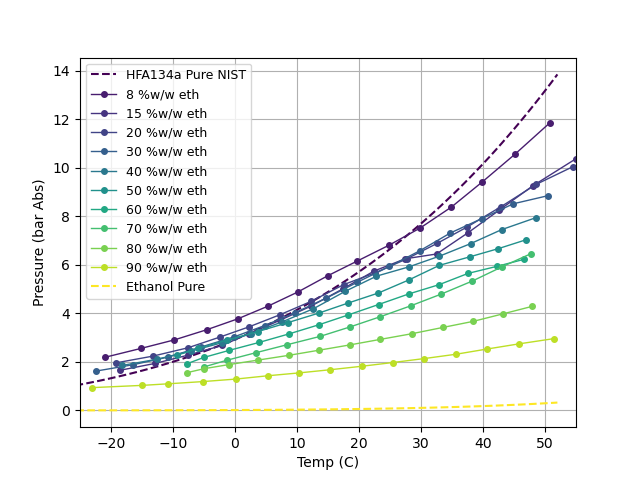

In [426]:
fig=plt.figure()
plt.plot(HFA134a_NIST['NIST_Temp_degC'],HFA134a_NIST['Pressure_bar_abs'],label='HFA134a Pure NIST',ls='--',c=cfun(0))
for e in data.keys():
    plt.plot(data[e][0],data[e][1],label='%i %%w/w eth'%e, marker='o', ms=4, lw=1, c=cfun(e/100.))
plt.plot(Ethanol_SVP['NIST_Temp_degC'],Ethanol_SVP['Pressure_bar_abs'],label='Ethanol Pure',ls='--',c=cfun(1.))
plt.legend(fontsize=9); plt.grid(); plt.xlim(-25,55)
plt.ylabel('Pressure (bar Abs)'); plt.xlabel('Temp (C)');

The 8% values being above the pure SVP at low temp, and some nonlinearity in the 50-70% eth range suggests some problems with the experiment. The curves are all smooth so failure to equilibriate is unlikely to be an issue. Possibly, the composition of the canister was not as intended (due to a leak?)

## Interpolate the data onto isotherms
So we can plot against ethanol fraction easily with a uniform set of temperatures as an independent variable.


In [476]:
# Set a known vector of ethanol mass fraction. Rather than using the 'nominal' value, we take the 'actual' measured value from the weights.
ethww = np.array([canister_massFracEth_actual[e] for e in data.keys()])
massEthanol = np.array([canister_eth_weights[e] for e in data.keys()])
massPropellant = np.array([canister_prop_weights[e] for e in data.keys()])

# Compute mole fraction from mass fraction
moles = ethww/mwt_ethanol + (1-ethww)/mwt_propellant
ethx = ethww/mwt_ethanol/moles
print("Mass fractions=",np.round(ethww,4))
print("Mole fractions=",np.round(ethx,4))
def mass_to_mole_fraction(m): return m/mwt_ethanol/((m/mwt_ethanol) + (1-m)/mwt_propellant)
def mole_to_mass_fraction(x): return x*mwt_ethanol/((x*mwt_ethanol) + (1-x)*mwt_propellant)

# Sanity-check
totmass = (ethx*mwt_ethanol) + (1-ethx)*mwt_propellant
print("Check mass fractions recovered:",np.isclose(ethx*mwt_ethanol/totmass, ethww))

Mass fractions= [0.0803 0.1496 0.2006 0.302  0.4311 0.493  0.5961 0.7055 0.808  0.9043]
Mole fractions= [0.1621 0.2804 0.3573 0.4893 0.6266 0.6829 0.7657 0.8414 0.9031 0.9544]
Check mass fractions recovered: [ True  True  True  True  True  True  True  True  True  True]


In [474]:
from scipy.interpolate import CubicSpline

# Set a known vector of temperatures. 
dT = 5
minval = np.nanmean([ np.nanmin(data[e][0]) for e in data.keys() ])
maxval = np.nanmean([ np.nanmax(data[e][0]) for e in data.keys() ])
all_temp = np.arange(np.round(minval,0), np.round(maxval,0), dT)
print("Interpolate to temps:",all_temp)

def normt(t_): return (t_-all_temp.min())/(all_temp.max()-all_temp.min())

# For each temperature, go through each nominal ethanol fraction and interpolate in temperature axis.
dataTempInterp={}
for new_temp in all_temp:
    interpolatedIsotherm = []
    for e in data.keys(): # will be same order everytime
        temp_src_data, pres_src_data = data[e] # get data
        f = (~np.isnan(pres_src_data))&(~np.isnan(temp_src_data)) # filter out NaN
        i = np.argsort(temp_src_data[f])
        cs = CubicSpline(temp_src_data[f][i], pres_src_data[f][i],extrapolate=False) # interpolate in temp axis
        interpolatedIsotherm.append(cs(new_temp)) # save result
    dataTempInterp[str(int(new_temp))] = np.array(interpolatedIsotherm) # save all eth fracs for new_temp

Interpolate to temps: [-15. -10.  -5.   0.   5.  10.  15.  20.  25.  30.  35.  40.  45.]


### Plot the data against temperature again for a sanity check on the interpolation
The dots (interp) should fall on the lines (original data)...

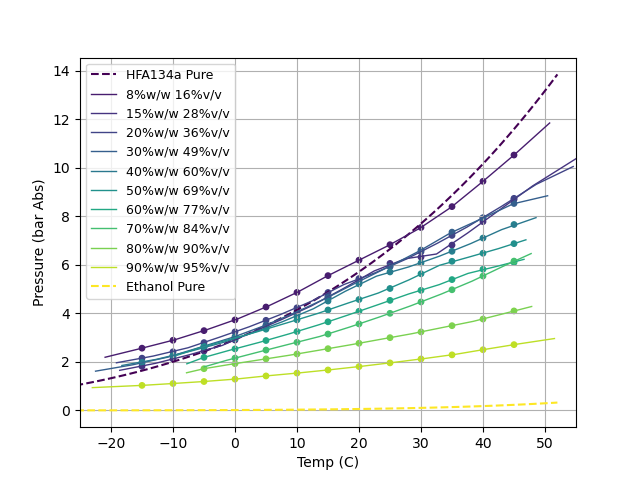

In [435]:
fig=plt.figure()
plt.plot(pureProp['NIST_Temp_degC'],pureProp['Pressure_bar_abs'],label='HFA134a Pure',ls='--',c=cfun(0))
for e in data.keys():
    plt.plot(data[e][0],data[e][1],label='%i%%w/w %.0f%%v/v'%(e,100*mass_to_mole_fraction(e/100.)), lw=1, c=cfun(e/100.))
for t in dataTempInterp.keys():
    plt.scatter(np.ones_like(ethww)*float(t),dataTempInterp[t], marker='o', s=15, lw=1, c=cfun(ethww))
plt.plot(Ethanol_SVP['NIST_Temp_degC'],Ethanol_SVP['Pressure_bar_abs'],label='Ethanol Pure',ls='--',c=cfun(1.))
plt.legend(fontsize=9); plt.grid(); plt.xlim(-25,55);
plt.ylabel('Pressure (bar Abs)'); plt.xlabel('Temp (C)'); 

Looks good. No crazy extrapolations.

In [436]:
# Interpolate pure propellant vapor pressure curve onto the same temperatures as the experimentally interpolated isotherms
def interpolate_pure_propellant(pureProp, all_temp):
    pure_interp=[]
    for t in all_temp:
        cs = CubicSpline(pureProp['NIST_Temp_degC'],pureProp['Pressure_bar_abs'])
        pure_interp.append(cs(t))
    return np.array(pure_interp)

### Make function to create pretty plot against ethanol fraction.

In [437]:
def make_composite_pressure_plot(all_temp, ethww, ethx, dataTempInterp, pure_interp=None, pureEthanolVP=None, xlabel1='Ethanol mass fraction [w/w]', xlabel2='Ethanol mole fraction [-]',\
                                ylabel='Pressure (bar Abs)', exptInLegend=False):
    fig=plt.figure()

    # tick labelling for mass and mole fractions
    a = np.copy(ethww); b=np.copy(ethx);
    
    # Pure propellant
    if pure_interp is not None:
        a=np.hstack((0,a)); b=np.hstack((0,b))
        for t in dataTempInterp.keys():
            i = np.where(np.isclose(all_temp,float(t)))[0][0]
            plt.plot((0,ethww[0]),(pure_interp[i], dataTempInterp[t][0]), ls='-.', lw=1, c=cfun(normt(float(t)))) # linking line
        plt.scatter(np.zeros_like(pure_interp), pure_interp, marker='x',label='HFA134a Pure',c=cfun(normt(all_temp)))
        
    # Interpolated experiment data
    l='Experimental data'
    for t in dataTempInterp.keys():
        if exptInLegend: l='T=%+0.0fºC'%(float(t))
        plt.plot(ethww,dataTempInterp[t], marker='o', label=l, ms=5, lw=1, c=cfun(normt(float(t))))
        if l is not None: l=None
    
    # Pure ethanol 
    if pureEthanolVP is not None:
        a=np.hstack((b,1)); b=np.hstack((b,1))
        i=0
        for t in dataTempInterp.keys():
            plt.plot((ethww[-1],1),(dataTempInterp[t][-1], pureEthanolVP[i]), ls='-.', lw=1, c=cfun(normt(float(t)))) # linking line
            i+=1
        plt.scatter(np.ones_like(all_temp), pureEthanolVP,marker='+',label='Ethanol Pure',c=cfun(normt(all_temp)))
        
    # Plot layout
    plt.grid();
    plt.ylabel(ylabel); plt.xlabel(xlabel1);
    plt.subplots_adjust(right=0.85); plt.xlim(-0.02,1.02)
    plt.legend(fontsize=9);
    
    # Add mole fraction axis
    ax1 = plt.gca()
    ax2 = plt.gca().twiny()
    plt.xlim(-0.02,1.02)
    ax2.set_xlabel(xlabel2);
    ax2.set_xticks(a,labels=["%.2f" % v for v in b],rotation=45)
    
    # Colorbar
    cax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
    cb = mpl.colorbar.ColorbarBase(cax, cmap='viridis',norm=mpl.colors.Normalize(all_temp.min(), all_temp.max()),ticks=all_temp)
    cb.set_label('Temperature [ºC]');

    return ax1

### Plot the raw experimental pressure data vs ethanol fraction

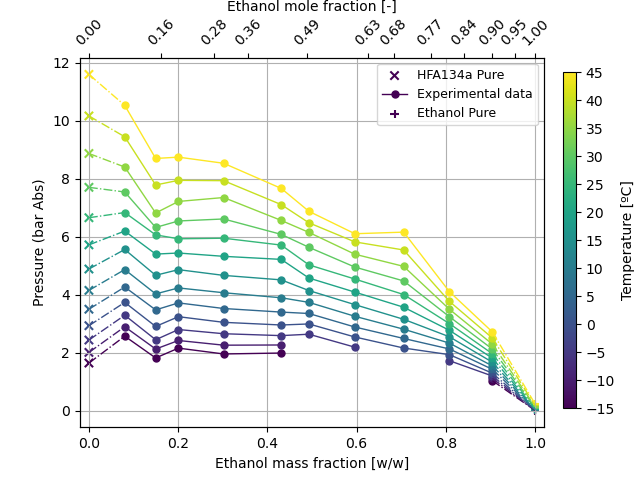

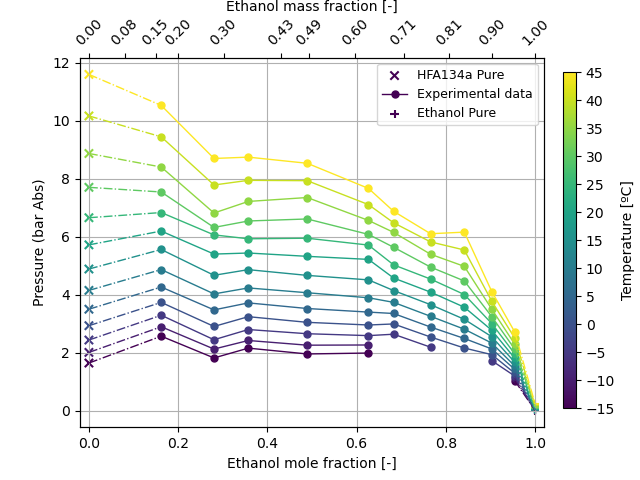

In [438]:
pureprop_interp = interpolate_pure_propellant(pureProp, all_temp)
pureEthanolVP=ethanol_antoine(all_temp)

make_composite_pressure_plot(all_temp, ethww, ethx, dataTempInterp, pureprop_interp, pureEthanolVP);
make_composite_pressure_plot(all_temp, ethx, ethww, dataTempInterp, pureprop_interp, pureEthanolVP, 'Ethanol mole fraction [-]', 'Ethanol mass fraction [-]');

From the above data we can see that there is definitely something suspect with the canister used for the 8-15% ethanol condition. The errors become severe at low temperatures.

### Show Raoult Law ideal mixture lines

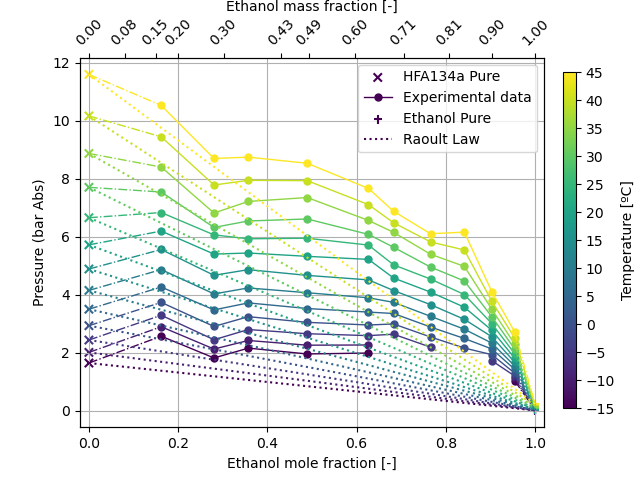

In [439]:
ax=make_composite_pressure_plot(all_temp, ethx, ethww, dataTempInterp, pureprop_interp, pureEthanolVP, 'Ethanol mole fraction [-]', 'Ethanol mass fraction [-]');
l='Raoult Law'
for p1,t in zip(pureprop_interp,all_temp):
    p2 = ethanol_antoine(np.array((t,)))[0]
    ax.plot((0,1),(p1,p2),ls=':',c=cfun(normt(t)),label=l)
    if l is not None: l=None
ax.legend();

Peak activity should occur at about 70-90% mole fraction. We can see that the deviation is positive under all conditions.

## Plot vs activity coefficient instead of physical pressure

/var/folders/6z/v83wfyrn4pqdkbl08lfx_pgmvzd0gj/T/ipykernel_39127/2689407919.py:22: RuntimeWarning: invalid value encountered in divide
  gamma[t]    = (p-pe)/(pp*(1-ethx_))


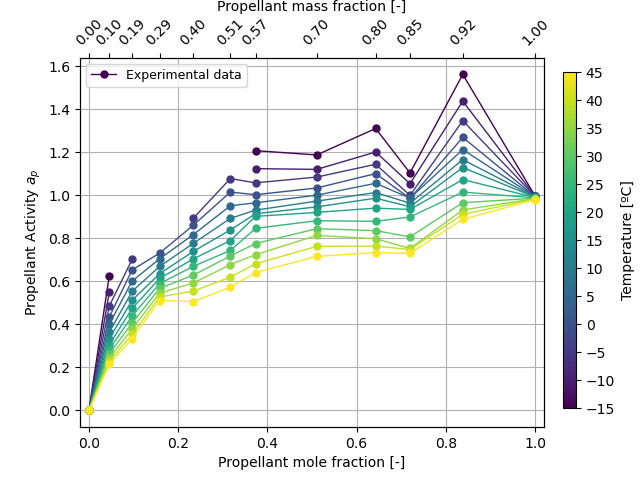

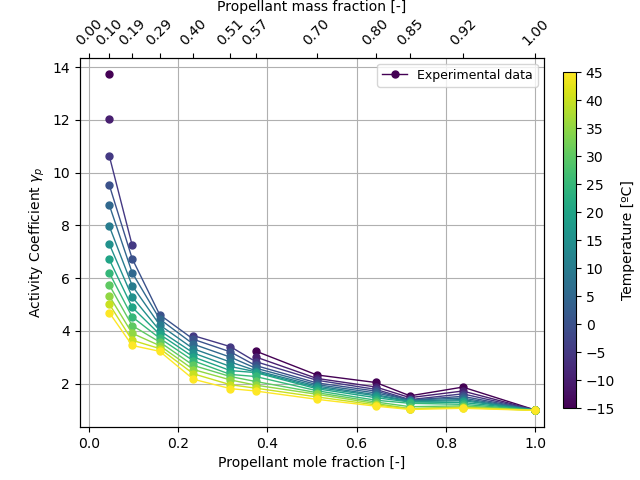

In [441]:
activity = {}
gamma = {}

# Add pure substance data inside
ethx_ = np.hstack((0,ethx,1))
ethww_= np.hstack((0,ethww,1))

for t,pp,pe in zip(dataTempInterp.keys(),pureprop_interp,pureEthanolVP): # loop temperatures:

    # p = system pressure at temp. t, pure substance properties appended.
    p = np.hstack((pp,dataTempInterp[t],pe)) 
    
    # p = gamma_p * y_p * pp + y_e * pe
    # so, gamma_p = (p - (y_e*pe))/(y_p*pp)

    # p = a_p * pp + pe

    raoult = (1-ethx_)*pp + ethx_*pe
    #activity[t] = (p - pe*ethx_)/((1-ethx_)*pp)
    
    activity[t] = (p-pe)/pp
    gamma[t]    = (p-pe)/(pp*(1-ethx_))
    
    #activityCoeffs[t] = np.log(p/raoult)
    #activityCoeffs[t]=activityCoeffs[t][::-1]
    


ax=make_composite_pressure_plot(all_temp, 1-ethx_, 1-ethww_, activity, None, None, 'Propellant mole fraction [-]', 'Propellant mass fraction [-]', r'Propellant Activity $a_p$');
ax=make_composite_pressure_plot(all_temp, 1-ethx_, 1-ethww_, gamma   , None, None, 'Propellant mole fraction [-]', 'Propellant mass fraction [-]', r'Activity Coefficient $\gamma_p$');
#ax.set_yscale('log'); ax.grid(which='minor',axis='y');# ax.set_ylim(0.5,15);


## Fit the Peng-Robinson equation of state to the data

see https://en.wikipedia.org/wiki/Cubic_equations_of_state for source of constants that are not listed.

### Solve the roots of the cubic EoS

In [785]:
# Scalar constants
R = 8.31446261815324 # J/mol-K
Omega_A = 0.45724
Omega_B = 0.07780
a = Omega_A*(R**2)*(Tc_p**2)/pc_p
b = Omega_B*R*Tc_p/pc_p

kappa = 0.37464+1.54226*omega_p-0.26992*omega_p**2 # Peng-Robinson

PR={'Z':[], 'Z2':[], 'Z3':[], 'x':[], 't':[], 'Vm':[], 'Vm2':[], 'Vm3':[], 'mwt':[]}
for t in dataTempInterp.keys():  # Loop through temperatures
    pressure = dataTempInterp[t]*1e5 # bar abs. to Pa
    TK = float(t)+273.15 # ºC to Kelvin
    Tr = TK/Tc_p # Reduced temperature
    alpha = (1+kappa*(1-np.sqrt(Tr)))**2 # PR coeff
    A = alpha*a*pressure/(R**2 * TK**2)  # PR coeff
    B = b*pressure/(R*TK)                # PR coeff

    # Cubic polynomial for Z is : Z^3 - (1-B)Z^2 + (A-2B-3B^2)Z - (AB-B^2-B^3) = 0
    # Estimate Z for each mole fraction and temperature.
    coeffs = np.vstack((np.ones_like(A), -(1-B), A-(2*B)-((3*B)**2), -(A*B - (B**2) - (B**3))))
    
    # Loop through mole fractions and solve individually.
    Z1=[]; Z2=[]; Z3=[]
    for i in range(len(A)):
        if ~np.any(np.isnan(coeffs[:,i])):

            # find roots of cubic polynomial
            Z_=np.roots(coeffs[:,i])  
            O=np.abs(Z_-1)
            Zsort = np.argsort(O)
            Z1.append( Z_[Zsort[0]] ) 
            Z2.append( Z_[Zsort[1]] )
            Z3.append( Z_[Zsort[2]] )
            #print(t,'ºC x=',ethx[i],'\tZ=',Z_)
        else:
            Z1.append(np.nan)
            Z2.append(np.nan)
            Z3.append(np.nan)

    # Save results
    PR['Z'].extend(Z1) # save Z1
    PR['Z2'].extend(Z2) # save Z2
    PR['Z3'].extend(Z3) # save Z3
    PR['x'].extend(np.ones_like(Z)*(1-ethx)) # save mole frac
    PR['t'].extend(np.ones_like(Z)*float(t)) # save temp

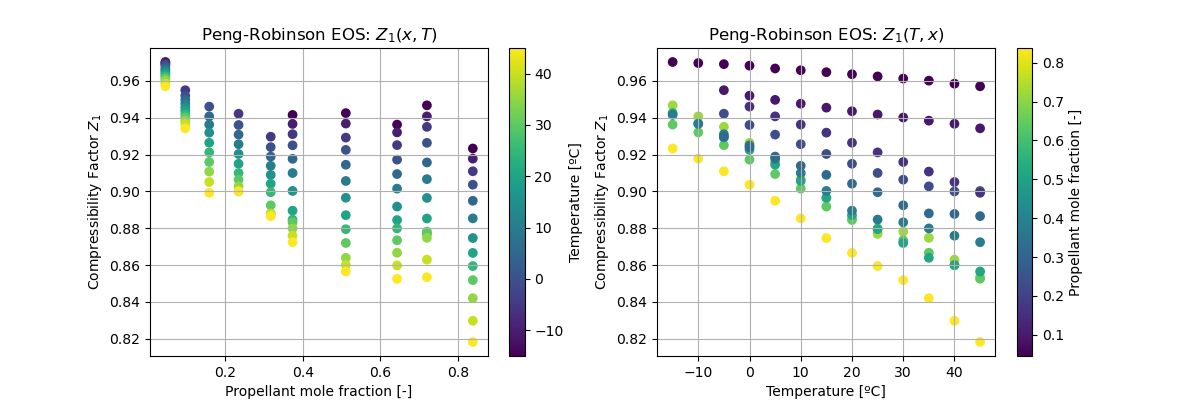

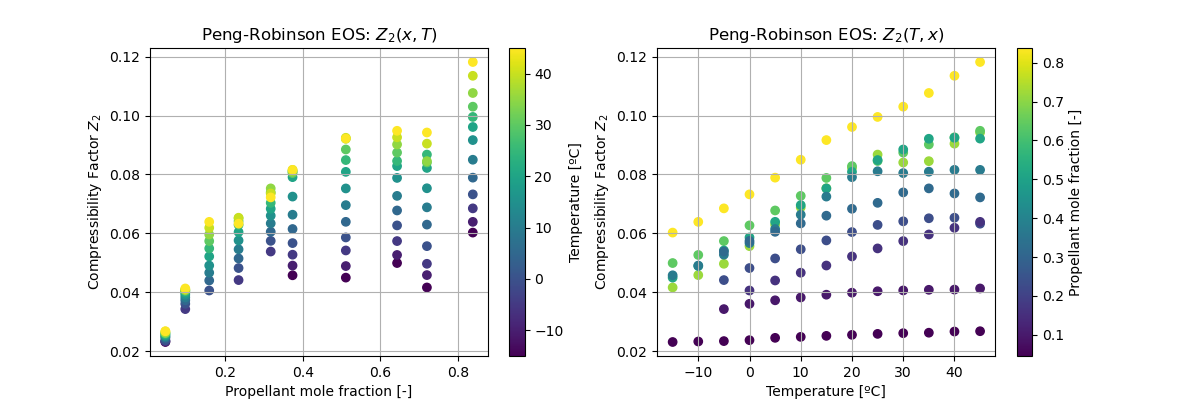

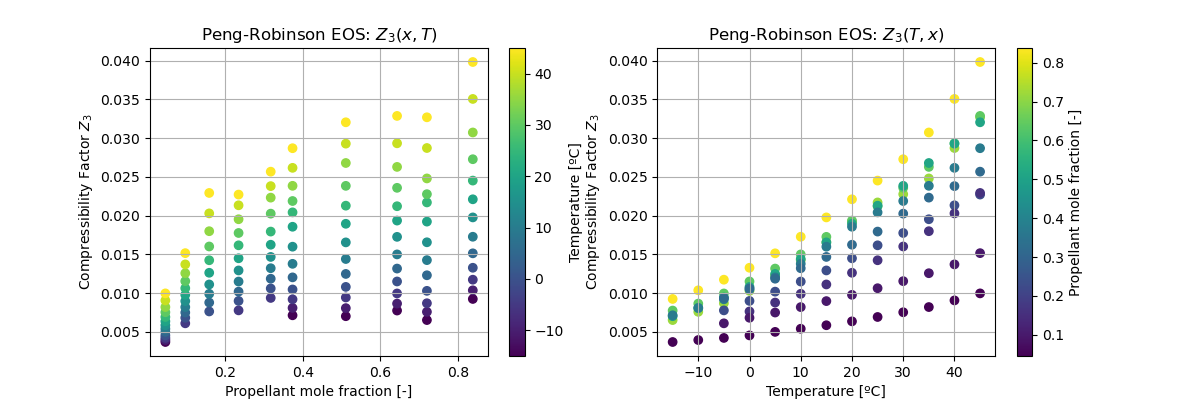

In [787]:
# PLOTS 

fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(121)
h=plt.scatter(PR['x'],PR['Z'],c=PR['t'])
plt.colorbar(h,label='Temperature [ºC]')
plt.xlabel('Propellant mole fraction [-]')
plt.ylabel(r'Compressibility Factor $Z_1$')
plt.title(r"Peng-Robinson EOS: $Z_1(x,T)$")
plt.grid();

ax=fig.add_subplot(122)
h=plt.scatter(PR['t'],PR['Z'],c=PR['x'])
plt.colorbar(h,label='Propellant mole fraction [-]')
plt.xlabel('Temperature [ºC]')
plt.ylabel(r'Compressibility Factor $Z_1$')
plt.title(r"Peng-Robinson EOS: $Z_1(T,x)$")
plt.grid();

fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(121)
h=plt.scatter(PR['x'],PR['Z2'],c=PR['t'])
plt.colorbar(h,label='Temperature [ºC]')
plt.xlabel('Propellant mole fraction [-]')
plt.ylabel(r'Compressibility Factor $Z_2$')
plt.title(r"Peng-Robinson EOS: $Z_2(x,T)$")
plt.grid();

ax=fig.add_subplot(122)
h=plt.scatter(PR['t'],PR['Z2'],c=PR['x'])
plt.colorbar(h,label='Propellant mole fraction [-]')
plt.xlabel('Temperature [ºC]')
plt.ylabel(r'Compressibility Factor $Z_2$')
plt.title(r"Peng-Robinson EOS: $Z_2(T,x)$")
plt.grid();

fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(121)
h=plt.scatter(PR['x'],PR['Z3'],c=PR['t'])
plt.colorbar(h,label='Temperature [ºC]')
plt.xlabel('Propellant mole fraction [-]')
plt.ylabel(r'Compressibility Factor $Z_3$')
plt.title(r"Peng-Robinson EOS: $Z_3(x,T)$")
plt.grid();

ax=fig.add_subplot(122)
h=plt.scatter(PR['t'],PR['Z3'],c=PR['x'])
plt.colorbar(h,label='Propellant mole fraction [-]')
plt.xlabel('Temperature [ºC]')
plt.ylabel(r'Compressibility Factor $Z_3$')
plt.title(r"Peng-Robinson EOS: $Z_3(T,x)$")
plt.grid();

### Calculate & plot molar volume & density of experimental data points


In [802]:
# Calculate Molar Volume without using pressure data, given Z = P V_m / RT.
# and p = RT/(Vm-b) - (a*alpha)/(Vm**2 + 2*b*Vm - b**2) = Z R T / Vm
# thus solve for Vm if  RT/(Vm-b) - (a*alpha)/(Vm**2 + 2*b*Vm - b**2) - (ZRT)/Vm = 0

from scipy.optimize import root_scalar

j=0
PR['Vm']=[]; PR['Vm2']=[]; PR['Vm3']=[]
for t in dataTempInterp.keys():  # Loop through temperatures
    pressure = dataTempInterp[t]*1e5 # bar abs. to Pa
    TK = float(t)+273.15 # ºC to Kelvin
    Tr = TK/Tc_p # Reduced temperature
    alpha = (1+kappa*(1-np.sqrt(Tr)))**2 # PR coeff
    A = alpha*a*pressure/(R**2 * TK**2)  # PR coeff
    B = np.nan # not used.
    
    def Vm_fun(Vm,T_,Z_):
        f =  (R*T_/(Vm-b)) - (Z_*R*T_/Vm) - (a*alpha/(Vm**2 + 2*b*Vm - b**2))
        #f += 1e6*((Vm<=0) + (Vm>.1))
        return f*1e6

    # Use system pressure for first point as initial guess.
    Vm1_est = PR['Z'][j]*R*TK/pressure[0]
    Vm2_est = PR['Z2'][j]*R*TK/pressure[0]
    Vm3_est = PR['Z3'][j]*R*TK/pressure[0]

    # Loop through mole fractions.
    Vm1=[]; Vm2=[]; Vm3=[]
    for i in range(len(A)):
        # solve molar volumes using Z
        Z1 = PR['Z'][j]
        Z2 = PR['Z2'][j]
        Z3 = PR['Z3'][j]
        # use system pressure as estimate?
        Vm1_est = Z1*R*TK/pressure[0]
        Vm2_est = Z2*R*TK/pressure[0]
        Vm3_est = Z3*R*TK/pressure[0]
        # Find roots of Vm_fun
        Vm1_ = root_scalar(Vm_fun, x0=Vm1_est, args=(TK,Z1), bracket=(1e-12,1))
        Vm2_ = root_scalar(Vm_fun, x0=Vm2_est, args=(TK,Z2), bracket=(1e-12,1))
        Vm3_ = root_scalar(Vm_fun, x0=Vm3_est, args=(TK,Z3), bracket=(1e-12,1))
        #print(Vm1_.root,Vm2_.root,Vm3_.root)
        Vm1.append(Vm1_.root); Vm2.append(Vm2_.root); Vm3.append(Vm3_.root)
        # Use last solution as guess for next one?
        #Vm1_est = Vm1_.root; Vm2_est = Vm2_.root; Vm3_est = Vm3_.root
        
        j+=1
    
    # Save results
    PR['Vm'].extend(Vm1) # Save molar vols.
    PR['Vm2'].extend(Vm2)
    PR['Vm3'].extend(Vm3)

# Filter results
for k in ['Vm','Vm2','Vm3']:
    PR[k] = np.array(PR[k])
    PR[k][PR[k]<1e-11]=np.nan

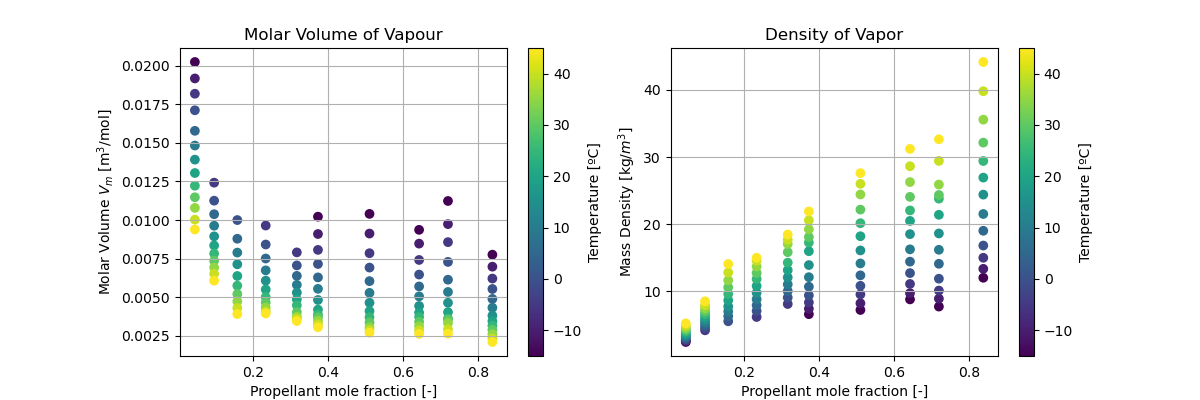

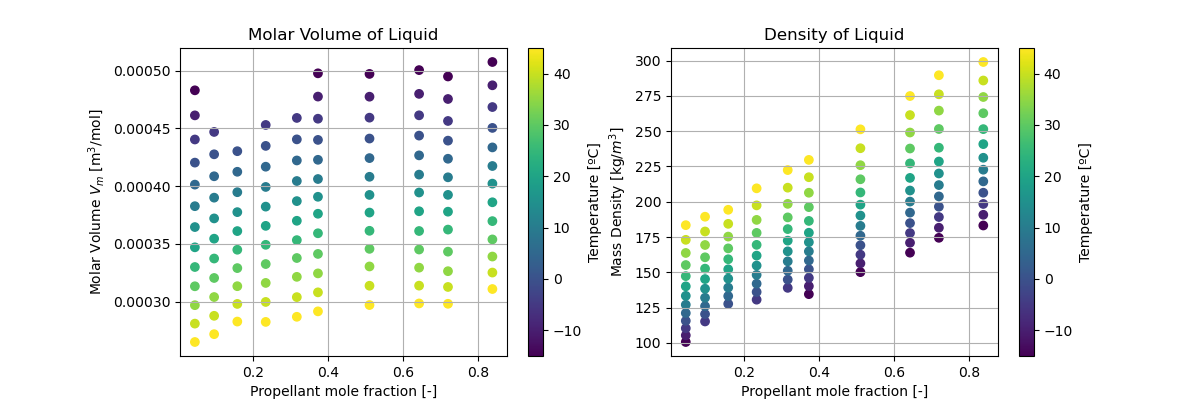

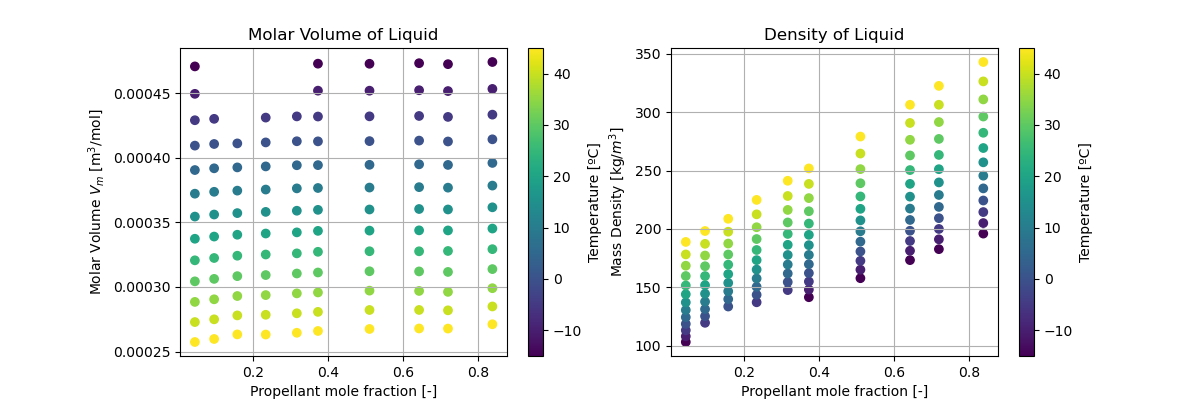

In [803]:
fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(121)
h=plt.scatter(np.array(PR['x']),PR['Vm'],c=PR['t'])
plt.colorbar(h,label='Temperature [ºC]')
plt.xlabel('Propellant mole fraction [-]')
plt.ylabel(r'Molar Volume $V_m$ [m$^3$/mol]')
plt.title('Molar Volume of Vapour')
plt.grid();
plt.subplots_adjust(left=0.15);

ax=fig.add_subplot(122)
x = np.array(PR['x'])
avg_molar_mass = mwt_ethanol*(1-x) + mwt_propellant*x # mixture molar weight , g/mol
est_dens = avg_molar_mass / np.array(PR['Vm']) # g/m^3
h=plt.scatter(PR['x'],est_dens/1e3,c=PR['t'])
plt.colorbar(h,label='Temperature [ºC]')
plt.xlabel('Propellant mole fraction [-]')
plt.ylabel(r'Mass Density [kg/$m^3$]')
plt.title('Density of Vapor')
plt.grid();

fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(121)
h=plt.scatter(np.array(PR['x']),PR['Vm2'],c=PR['t'])
plt.colorbar(h,label='Temperature [ºC]')
plt.xlabel('Propellant mole fraction [-]')
plt.ylabel(r'Molar Volume $V_m$ [m$^3$/mol]')
plt.title('Molar Volume of Liquid')
plt.grid();
plt.subplots_adjust(left=0.15);

ax=fig.add_subplot(122)
est_dens = avg_molar_mass / np.array(PR['Vm2']) # g/m^3
h=plt.scatter(PR['x'],est_dens/1e3,c=PR['t'])
plt.colorbar(h,label='Temperature [ºC]')
plt.xlabel('Propellant mole fraction [-]')
plt.ylabel(r'Mass Density [kg/$m^3$]')
plt.title('Density of Liquid')
plt.grid();

fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(121)
h=plt.scatter(np.array(PR['x']),PR['Vm3'],c=PR['t'])
plt.colorbar(h,label='Temperature [ºC]')
plt.xlabel('Propellant mole fraction [-]')
plt.ylabel(r'Molar Volume $V_m$ [m$^3$/mol]')
plt.title('Molar Volume of Liquid')
plt.grid();
plt.subplots_adjust(left=0.15);

ax=fig.add_subplot(122)
est_dens = avg_molar_mass / np.array(PR['Vm3']) # g/m^3
h=plt.scatter(PR['x'],est_dens/1e3,c=PR['t'])
plt.colorbar(h,label='Temperature [ºC]')
plt.xlabel('Propellant mole fraction [-]')
plt.ylabel(r'Mass Density [kg/$m^3$]')
plt.title('Density of Liquid')
plt.grid();

### Fit lines to Z(T,x)

We can see that Z is almost linearly proportional to temperature and the gradient may be expressed as a function of x. We know that $Z \to 1$ as $T_r \to 0$.

In [804]:
from scipy.stats import linregress
t_ = np.arange(250,325,1)

#### Fitting to $Z_1$

x=0.045599, R^2=0.990893, slope=-0.083377, intercept=1.028652
x=0.096888, R^2=0.994513, slope=-0.147786, intercept=1.059832
x=0.158601, R^2=0.998694, slope=-0.386195, intercept=1.228506
x=0.234272, R^2=0.974810, slope=-0.331541, intercept=1.176957
x=0.317112, R^2=0.979564, slope=-0.343980, intercept=1.174409
x=0.373379, R^2=0.973936, slope=-0.466429, intercept=1.262870
x=0.510657, R^2=0.993916, slope=-0.576160, intercept=1.341132
x=0.642727, R^2=0.996893, slope=-0.536401, intercept=1.307705
x=0.719646, R^2=0.983900, slope=-0.589440, intercept=1.353851
x=0.837931, R^2=0.994954, slope=-0.654321, intercept=1.379140


/var/folders/6z/v83wfyrn4pqdkbl08lfx_pgmvzd0gj/T/ipykernel_39127/517076445.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset_TK, subset_Z, c=cfun(xp))


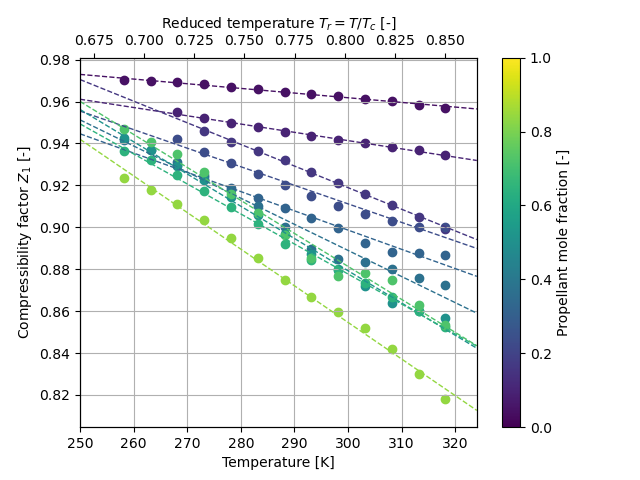

In [805]:

# Sort out data by mole fractions (rounded to nearest ppm)
fig=plt.figure()

Zfit_results=[]

for xp in np.unique(np.round(PR['x'],6)):
    i = np.where(np.isclose(PR['x'],xp))[0] # data points that match
    subset_TK = np.array(PR['t'])[i] + 273.15 # temp in Kelvin
    subset_Tr = subset_TK/Tc_p
    subset_Z = np.array(PR['Z'])[i] # Z previously obtained from Cubic EoS
    f = ~np.isnan(subset_Z) # filter on non-NaN values
    
    slope, intercept, r_value, p_value, std_err = linregress(subset_Tr[f], subset_Z[f])
    print("x=%f, R^2=%f, slope=%f, intercept=%f" % (xp,r_value**2,slope,intercept))
    Zfit_results.append((xp, slope, intercept, std_err, r_value **2))

    plt.scatter(subset_TK, subset_Z, c=cfun(xp))
    plt.plot(t_, slope*(t_/Tc_p) + intercept, lw=1, ls='--', c=cfun(xp))

plt.xlim(t_.min(),t_.max());
plt.grid();
plt.colorbar(label='Propellant mole fraction [-]');
plt.xlabel('Temperature [K]');
plt.ylabel(r'Compressibility factor $Z_1$ [-]')

plt.gca().twiny();
plt.xlim(t_.min()/Tc_p,t_.max()/Tc_p);
plt.xlabel(r'Reduced temperature $T_r = T/T_c$ [-]')

# Data are saved as [:, (mole fraction, slope(1/Tr), interept, stderr, r^2) ]
Zfit_results=np.array(Zfit_results)

In [806]:
# fit the slope and intercept as a function of x
from scipy.optimize import curve_fit
def ffit_Zx(x,a,b,c):
    return a*np.log(np.abs(b*x+c))

def r2_nonlin(original_data, fitted):
    ss_err = np.sum((original_data-fitted)**2)
    ss_tot = np.sum(original_data**2)
    return 1-np.sqrt(ss_err/ss_tot)

x_ = np.linspace(0,1,50);
popt_slope, pcov_slope = curve_fit(ffit_Zx, Zfit_results[:,0],Zfit_results[:,1],p0=(-1,1,0),sigma=Zfit_results[:,3])
r2_slope = r2_nonlin(Zfit_results[:,1], ffit_Zx(Zfit_results[:,0],*popt_slope))
print("Slope: %s, R^2 = %f" % (popt_slope, r2_slope))
print("\tslope = %g * ln( %g x %+g )" % tuple(popt_slope))

popt_intercept, pcov_intercept = curve_fit(ffit_Zx, Zfit_results[:,0],Zfit_results[:,2],p0=(1,1,1),sigma=Zfit_results[:,3])
r2_intercept = r2_nonlin(Zfit_results[:,2], ffit_Zx(Zfit_results[:,0],*popt_intercept))
print("Intercept: %s, R^2 = %f" % (popt_intercept, r2_intercept))
print("\tintercept = %g * ln( %g x %+g )" % tuple(popt_intercept))

Slope: [-0.22334057 20.45493077  0.48280447], R^2 = 0.887453
	slope = -0.223341 * ln( 20.4549 x +0.482804 )
Intercept: [1.41185974e-01 1.98613022e+04 5.08381889e+02], R^2 = 0.968932
	intercept = 0.141186 * ln( 19861.3 x +508.382 )


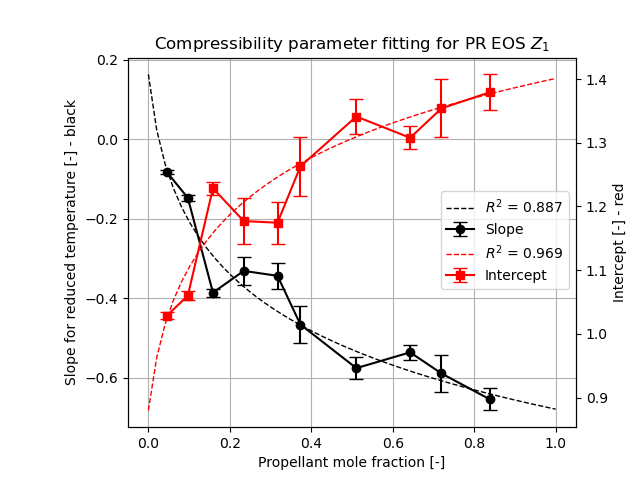

In [807]:
# Plot the slopes and offsets as a function of mole fraction
fig=plt.figure()
p0=plt.errorbar(Zfit_results[:,0],Zfit_results[:,1],yerr=2*Zfit_results[:,3],\
             capsize=5,label='Slope',marker='o',c='k');
p1,=plt.plot(x_, ffit_Zx(x_,*popt_slope), ls='--', lw=1, c='k', label=r'$R^2$ = %.3f' % r2_slope)

plt.grid();
plt.ylabel('Slope for reduced temperature [-] - black');
plt.title(r"Compressibility parameter fitting for PR EOS $Z_1$");
plt.xlabel("Propellant mole fraction [-]")

plt.gca().twinx();
p2=plt.errorbar(Zfit_results[:,0],Zfit_results[:,2],yerr=2*Zfit_results[:,3],\
             capsize=5,label='Intercept',marker='s',c='r');
p3,=plt.plot(x_, ffit_Zx(x_,*popt_intercept), ls='--', lw=1, c='r', label=r'$R^2$ = %.3f' % r2_intercept)
plt.ylabel('Intercept [-] - red');

plt.subplots_adjust(left=0.2);
fig.legend(loc=5, bbox_to_anchor=(0.9, 0.5));

#### Fitting to $Z_2$

x=0.045599, R^2=0.980895, slope=0.024986, intercept=0.005819
x=0.096888, R^2=0.884125, slope=0.048299, intercept=0.001182
x=0.158601, R^2=0.996407, slope=0.193843, intercept=-0.100110
x=0.234272, R^2=0.883483, slope=0.155933, intercept=-0.064211
x=0.317112, R^2=0.893155, slope=0.153650, intercept=-0.053546
x=0.373379, R^2=0.913860, slope=0.252091, intercept=-0.125694
x=0.510657, R^2=0.971146, slope=0.327009, intercept=-0.178986
x=0.642727, R^2=0.976509, slope=0.295244, intercept=-0.152372
x=0.719646, R^2=0.952520, slope=0.338893, intercept=-0.190004
x=0.837931, R^2=0.996113, slope=0.367453, intercept=-0.193746


/var/folders/6z/v83wfyrn4pqdkbl08lfx_pgmvzd0gj/T/ipykernel_39127/3927366098.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset_TK, subset_Z, c=cfun(xp))


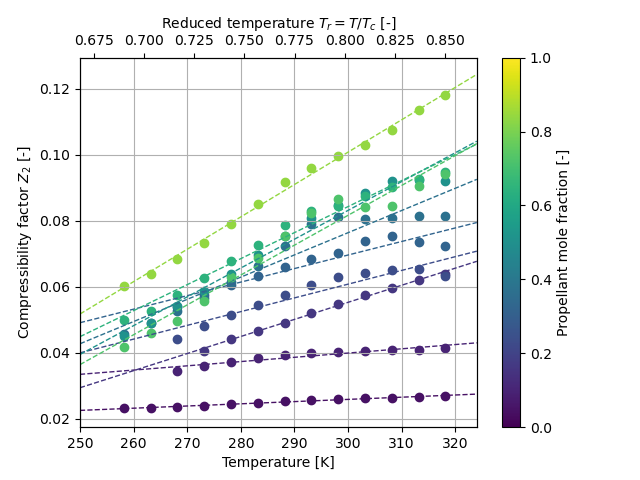

In [808]:
fig=plt.figure()
Z2fit_results=[]

for xp in np.unique(np.round(PR['x'],6)):
    i = np.where(np.isclose(PR['x'],xp))[0] # data points that match
    subset_TK = np.array(PR['t'])[i] + 273.15 # temp in Kelvin
    subset_Tr = subset_TK/Tc_p
    subset_Z = np.array(PR['Z2'])[i] # Z_2 previously obtained from Cubic EoS
    f = ~np.isnan(subset_Z) # filter on non-NaN values
    
    slope, intercept, r_value, p_value, std_err = linregress(subset_Tr[f], subset_Z[f])
    print("x=%f, R^2=%f, slope=%f, intercept=%f" % (xp,r_value**2,slope,intercept))
    Z2fit_results.append((xp, slope, intercept, std_err, r_value **2))

    plt.scatter(subset_TK, subset_Z, c=cfun(xp))
    plt.plot(t_, slope*(t_/Tc_p) + intercept, lw=1, ls='--', c=cfun(xp))

plt.xlim(t_.min(),t_.max());
plt.grid();
plt.colorbar(label='Propellant mole fraction [-]');
plt.xlabel('Temperature [K]');
plt.ylabel(r'Compressibility factor $Z_2$ [-]')

plt.gca().twiny();
plt.xlim(t_.min()/Tc_p,t_.max()/Tc_p);
plt.xlabel(r'Reduced temperature $T_r = T/T_c$ [-]')

# Data are saved as [:, (mole fraction, slope(1/Tr), interept, stderr, r^2) ]
Z2fit_results=np.array(Z2fit_results)

Slope: [ 0.12601867 21.31182678  0.2437131 ], R^2 = 0.828339
	slope = 0.126019 * ln( 21.3118 x +0.243713 )
Intercept: [-0.07293433 16.95924183  0.14626965], R^2 = 0.749437
	intercept = -0.0729343 * ln( 16.9592 x +0.14627 )


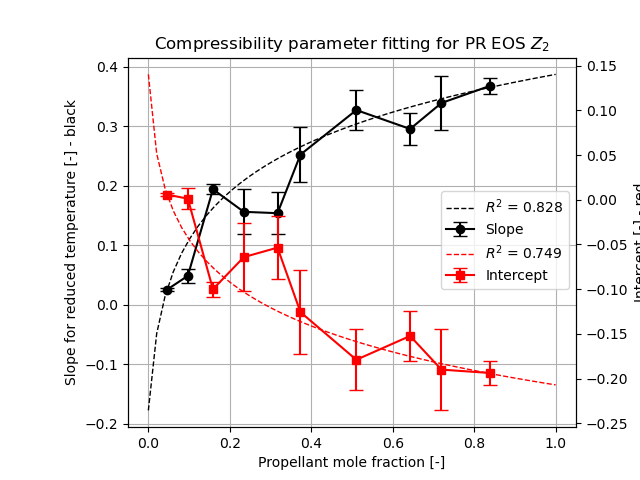

In [809]:
# fit the slope and intercept as a function of x
def ffit_Zx2(x,a,b,c):
    return a*np.log(np.abs(b*x+c))

x_ = np.linspace(0,1,50);
popt_slope, pcov_slope = curve_fit(ffit_Zx2, Z2fit_results[:,0],Z2fit_results[:,1],p0=(-1,1,0),sigma=Z2fit_results[:,3])
r2_slope = r2_nonlin(Z2fit_results[:,1], ffit_Zx2(Z2fit_results[:,0],*popt_slope))
print("Slope: %s, R^2 = %f" % (popt_slope, r2_slope))
print("\tslope = %g * ln( %g x %+g )" % tuple(popt_slope))

popt_intercept, pcov_intercept = curve_fit(ffit_Zx2, Z2fit_results[:,0],Z2fit_results[:,2],p0=(1,1,0),sigma=Z2fit_results[:,3])
r2_intercept = r2_nonlin(Z2fit_results[:,2], ffit_Zx2(Z2fit_results[:,0],*popt_intercept))
print("Intercept: %s, R^2 = %f" % (popt_intercept, r2_intercept))
print("\tintercept = %g * ln( %g x %+g )" % tuple(popt_intercept))

# Plot the slopes and offsets as a function of mole fraction
fig=plt.figure()
p0=plt.errorbar(Z2fit_results[:,0],Z2fit_results[:,1],yerr=2*Z2fit_results[:,3],\
             capsize=5,label='Slope',marker='o',c='k');
p1,=plt.plot(x_, ffit_Zx2(x_,*popt_slope), ls='--', lw=1, c='k', label=r'$R^2$ = %.3f' % r2_slope)

plt.grid();
plt.ylabel('Slope for reduced temperature [-] - black');
plt.title(r"Compressibility parameter fitting for PR EOS $Z_2$");
plt.xlabel("Propellant mole fraction [-]")

plt.gca().twinx();
p2=plt.errorbar(Z2fit_results[:,0],Z2fit_results[:,2],yerr=2*Z2fit_results[:,3],\
             capsize=5,label='Intercept',marker='s',c='r');
p3,=plt.plot(x_, ffit_Zx2(x_,*popt_intercept), ls='--', lw=1, c='r', label=r'$R^2$ = %.3f' % r2_intercept)
plt.ylabel('Intercept [-] - red');

plt.subplots_adjust(left=0.2);
fig.legend(loc=5, bbox_to_anchor=(0.9, 0.5));

#### Fitting to $Z_3$

x=0.045599, R^2=0.969437, slope=0.038190, intercept=-0.023184
x=0.096888, R^2=0.987225, slope=0.065565, intercept=-0.041260
x=0.158601, R^2=0.979753, slope=0.124619, intercept=-0.084292
x=0.234272, R^2=0.996014, slope=0.114155, intercept=-0.074563
x=0.317112, R^2=0.991894, slope=0.124463, intercept=-0.080586
x=0.373379, R^2=0.989052, slope=0.137321, intercept=-0.089092
x=0.510657, R^2=0.982927, slope=0.159035, intercept=-0.104686
x=0.642727, R^2=0.979635, slope=0.154589, intercept=-0.100879
x=0.719646, R^2=0.980550, slope=0.159592, intercept=-0.105485
x=0.837931, R^2=0.965068, slope=0.184355, intercept=-0.120695


/var/folders/6z/v83wfyrn4pqdkbl08lfx_pgmvzd0gj/T/ipykernel_39127/3456982727.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset_TK, subset_Z, c=cfun(xp))


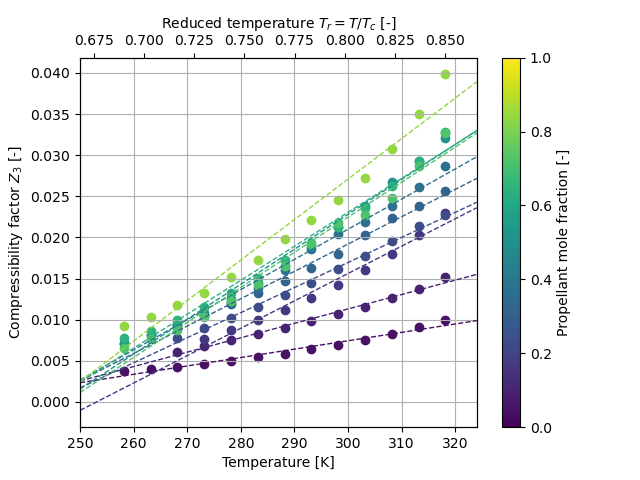

In [810]:
fig=plt.figure()
Z3fit_results=[]

for xp in np.unique(np.round(PR['x'],6)):
    i = np.where(np.isclose(PR['x'],xp))[0] # data points that match
    subset_TK = np.array(PR['t'])[i] + 273.15 # temp in Kelvin
    subset_Tr = subset_TK/Tc_p
    subset_Z = np.array(PR['Z3'])[i] # Z_3 previously obtained from Cubic EoS
    f = ~np.isnan(subset_Z) # filter on non-NaN values
    
    slope, intercept, r_value, p_value, std_err = linregress(subset_Tr[f], subset_Z[f])
    print("x=%f, R^2=%f, slope=%f, intercept=%f" % (xp,r_value**2,slope,intercept))
    Z3fit_results.append((xp, slope, intercept, std_err, r_value **2))

    plt.scatter(subset_TK, subset_Z, c=cfun(xp))
    plt.plot(t_, slope*(t_/Tc_p) + intercept, lw=1, ls='--', c=cfun(xp))

plt.xlim(t_.min(),t_.max());
plt.grid();
plt.colorbar(label='Propellant mole fraction [-]');
plt.xlabel('Temperature [K]');
plt.ylabel(r'Compressibility factor $Z_3$ [-]')

plt.gca().twiny();
plt.xlim(t_.min()/Tc_p,t_.max()/Tc_p);
plt.xlabel(r'Reduced temperature $T_r = T/T_c$ [-]')

# Data are saved as [:, (mole fraction, slope(1/Tr), interept, stderr, r^2) ]
Z3fit_results=np.array(Z3fit_results)

Slope: [ 0.04985088 40.04352187  0.28796207], R^2 = 0.916540
	slope = 0.0498509 * ln( 40.0435 x +0.287962 )
Intercept: [-3.31928695e-02  3.81998124e+01  2.30751588e-01], R^2 = 0.905196
	intercept = -0.0331929 * ln( 38.1998 x +0.230752 )


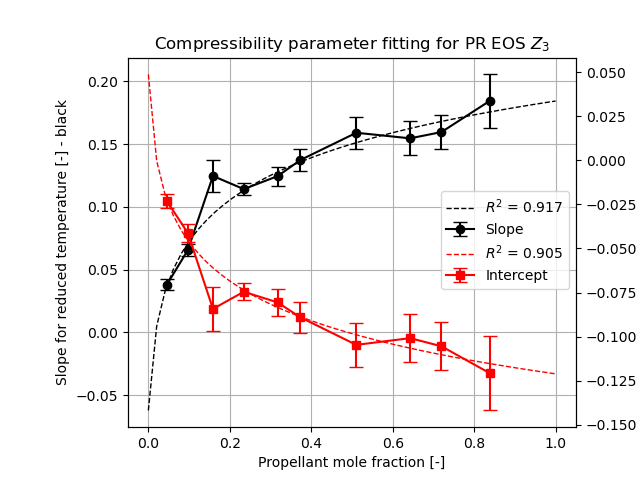

In [811]:
# fit the slope and intercept as a function of x
def ffit_Zx3(x,a,b,c):
    return a*np.log(np.abs(b*x+c))

x_ = np.linspace(0,1,50);
popt_slope, pcov_slope = curve_fit(ffit_Zx3, Z3fit_results[:,0],Z3fit_results[:,1],p0=(-1,1,0),sigma=Z3fit_results[:,3])
r2_slope = r2_nonlin(Z3fit_results[:,1], ffit_Zx3(Z3fit_results[:,0],*popt_slope))
print("Slope: %s, R^2 = %f" % (popt_slope, r2_slope))
print("\tslope = %g * ln( %g x %+g )" % tuple(popt_slope))

popt_intercept, pcov_intercept = curve_fit(ffit_Zx3, Z3fit_results[:,0],Z3fit_results[:,2],p0=(1,1,0),sigma=Z3fit_results[:,3])
r2_intercept = r2_nonlin(Z3fit_results[:,2], ffit_Zx3(Z3fit_results[:,0],*popt_intercept))
print("Intercept: %s, R^2 = %f" % (popt_intercept, r2_intercept))
print("\tintercept = %g * ln( %g x %+g )" % tuple(popt_intercept))

# Plot the slopes and offsets as a function of mole fraction
fig=plt.figure()
p0=plt.errorbar(Z3fit_results[:,0],Z3fit_results[:,1],yerr=2*Z3fit_results[:,3],\
             capsize=5,label='Slope',marker='o',c='k');
p1,=plt.plot(x_, ffit_Zx3(x_,*popt_slope), ls='--', lw=1, c='k', label=r'$R^2$ = %.3f' % r2_slope)

plt.grid();
plt.ylabel('Slope for reduced temperature [-] - black');
plt.title(r"Compressibility parameter fitting for PR EOS $Z_3$");
plt.xlabel("Propellant mole fraction [-]")

plt.gca().twinx();
p2=plt.errorbar(Z3fit_results[:,0],Z3fit_results[:,2],yerr=2*Z3fit_results[:,3],\
             capsize=5,label='Intercept',marker='s',c='r');
p3,=plt.plot(x_, ffit_Zx3(x_,*popt_intercept), ls='--', lw=1, c='r', label=r'$R^2$ = %.3f' % r2_intercept)
plt.ylabel('Intercept [-] - red');

plt.subplots_adjust(left=0.2);
fig.legend(loc=5, bbox_to_anchor=(0.9, 0.5));

## Attempt to recover system pressure using PR EoS

Having naively fitted some curves, we can see that:

$ Z(x,T_r) = c_0 T_r + c_1 $

$ c_0 = c_{00} \log_e \left( c_{01} x + c_{02} \right) $

$ c_1 = c_{10} \log_e \left( c_{11} x + c_{12} \right) $

Thus;

$ Z(x,T_r) = \left[ c_{00} \log_e \left( c_{01} x + c_{02} \right) \right] T_r + \left[ c_{10} \log_e \left( c_{11} x + c_{12} \right) \right] $

The linearity with $T_r$ is very good, the fitting of $c_{0,1}$ is less good (due to experimental inconsistencies between canisters and experiment runs).

From the above, we can use the Peng-Robinson equation of state to now recover the system pressure, given:

$ Z = \frac{p V_m}{RT} $

and pressure is

$ p = Z(x,T_r) \frac{R T}{V_m} $

In [812]:
# Get net mass (measured)
canister_weights=massEthanol + massPropellant

# From experimental data, set the independent variables for 
TK = all_temp + 273.15
x = np.linspace(0,1,50) #1-ethx

'''
Z_1

Slope: [-0.22334057 20.45493077  0.48280447], R^2 = 0.887453
	slope = -0.223341 * ln( 20.4549 Tr +0.482804 )
Intercept: [1.41185974e-01 1.98613022e+04 5.08381889e+02], R^2 = 0.968932
	intercept = 0.141186 * ln( 19861.3 Tr +508.382 )
'''
c0 =  -0.22334057 * np.log( 20.45493077 * x + 0.48280447 )
c1 = 1.41185974e-01 * np.log(1.98613022e+04 * x +5.08381889e+02 )
'''
Z_2 

Slope: [ 0.12601867 21.31182678  0.2437131 ], R^2 = 0.828339
	slope = 0.126019 * ln( 21.3118 x +0.243713 )
Intercept: [-0.07293433 16.95924183  0.14626965], R^2 = 0.749437
	intercept = -0.0729343 * ln( 16.9592 x +0.14627 )
 
'''
c2 =  0.12601867 * np.log( 21.31182678*x+  0.2437131 )
c3 = -0.07293433 * np.log( 16.95924183*x+  0.14626965)

'''
Slope: [ 0.04985088 40.04352187  0.28796207], R^2 = 0.916540
	slope = 0.0498509 * ln( 40.0435 x +0.287962 )
Intercept: [-3.31928695e-02  3.81998124e+01  2.30751588e-01], R^2 = 0.905196
	intercept = -0.0331929 * ln( 38.1998 x +0.230752 )
'''
c4 =  0.04985088 *np.log(40.04352187  *x+0.28796207)
c5 = -3.31928695e-02 *np.log( 3.81998124e+01 *x+ 2.30751588e-01)

/var/folders/6z/v83wfyrn4pqdkbl08lfx_pgmvzd0gj/T/ipykernel_39127/4246498245.py:34: RuntimeWarning: divide by zero encountered in divide
  prgamma.append(    (p2/1e5-pureEthanolVP[i])/(pureprop_interp[i]*x) )


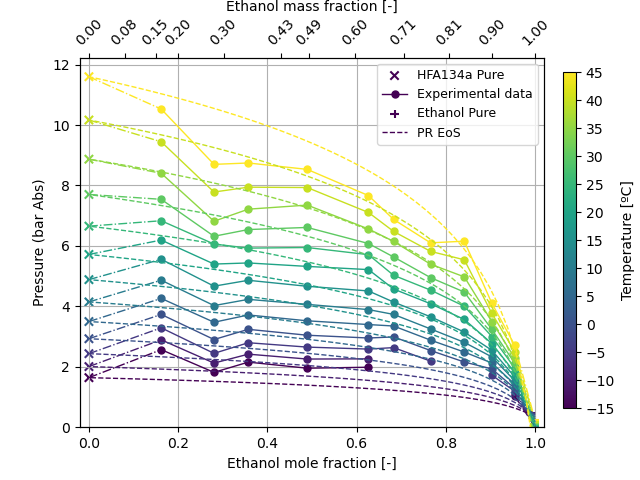

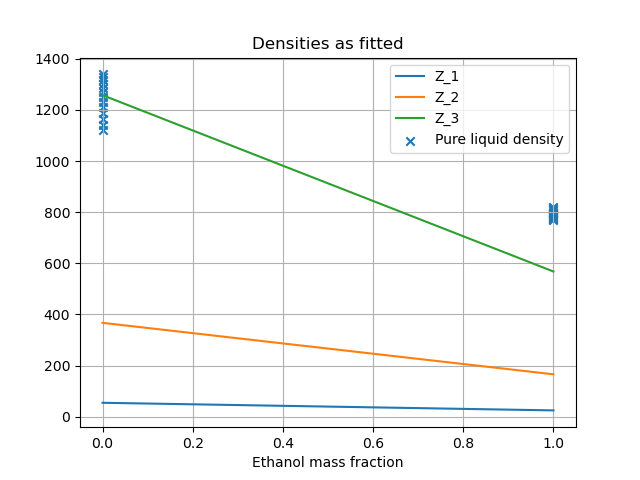

In [911]:
# Set volume (static)
#systemVolume = 400e-6 # 15-16cc for the canister plus a little extra for the tubing

ax = make_composite_pressure_plot(all_temp, ethx, ethww, dataTempInterp, pureprop_interp, pureEthanolVP,'Ethanol mole fraction [-]', 'Ethanol mass fraction [-]');

#fig=plt.figure(); ax=fig.add_subplot(111);

practivity=[]
prgamma=[]

# Loop temperatures
for i in range(len(TK)):
    t  = TK[i]
    tr = t/Tc_p
    Z1 = c0*(tr) + c1
    Z2 = c2*(tr) + c3
    Z3 = c4*(tr) + c5
    mwt = mwt_ethanol*(1-x) + mwt_propellant*(x)
    #dens = np.median(canister_weights) / systemVolume # g/m^3
    #Vm = mwt / dens # m^3/mol = mwt [g/mol] / dens [g/m^3]
    #alpha = (1+kappa*(1-np.sqrt(tr)))**2 # PR coeff
    
    # Force molar volume to be such that the pure property data is satisfied (Vm=ZRT/p_sat)
    Vm1 = Z1[-1]*R*t/(pureprop_interp[i]*1e5)
    Vm2 = Z2[-1]*R*t/(pureprop_interp[i]*1e5)
    Vm3 = Z3[-1]*R*t/(pureprop_interp[i]*1e5)

    #print("T=%fºC, Vm=%f %f %f" %(t,Vm1,Vm2,Vm3))
    p1 = Z1*R*t/(Vm1)
    p2 = Z2*R*t/(Vm2)
    p3 = Z3*R*t/(Vm3)

    practivity.append( (p2/1e5-pureEthanolVP[i])/pureprop_interp[i] )
    prgamma.append(    (p2/1e5-pureEthanolVP[i])/(pureprop_interp[i]*x) )
    
    if i==0: lab="PR EoS"
    else: lab=None
        
    #ax.plot(1-x,p1/1e5,lw=1,ls='-.',c=cfun(normt(t - 273.15)), label=lab )
    ax.plot(1-x,p2/1e5,lw=1,ls='--',c=cfun(normt(t - 273.15)) , label=lab)
    #ax.plot(1-x,p3/1e5,lw=1,ls=':',c=cfun(normt(t - 273.15)) , label=lab)

ax.legend(fontsize=9);
ax.set_ylim(0,)

'''
plt.grid();
plt.xlabel("Ethanol mole fraction [-]")
plt.ylabel("Pressure [bar]")
plt.subplots_adjust(right=0.85); 

# Colorbar
cax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
cb = mpl.colorbar.ColorbarBase(cax, cmap='viridis',norm=mpl.colors.Normalize(all_temp.min(), all_temp.max()),ticks=all_temp)
cb.set_label('Temperature [ºC]');
'''

fig=plt.figure(); ax=fig.add_subplot(111);
plt.plot(1-x, 1e-3*mwt/Vm1, label=r"Z_1");
plt.plot(1-x, 1e-3*mwt/Vm2, label=r"Z_2");
plt.plot(1-x, 1e-3*mwt/Vm3, label=r"Z_3");
plt.scatter((np.zeros_like(TK),np.ones_like(TK)),\
            (1e-3*mwt_propellant/purePropLiquidMolarVolume(TK),1e-3*mwt_ethanol/ethanolLiquidMolarVolume(TK)),\
           marker='x',label="Pure liquid density")
plt.title("Densities as fitted")
plt.grid(); plt.legend();
plt.xlabel("Ethanol mass fraction");

### Now plot the activity of the model vs real data

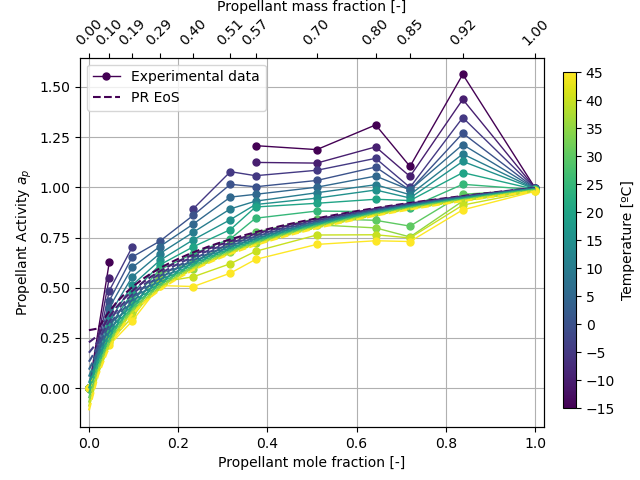

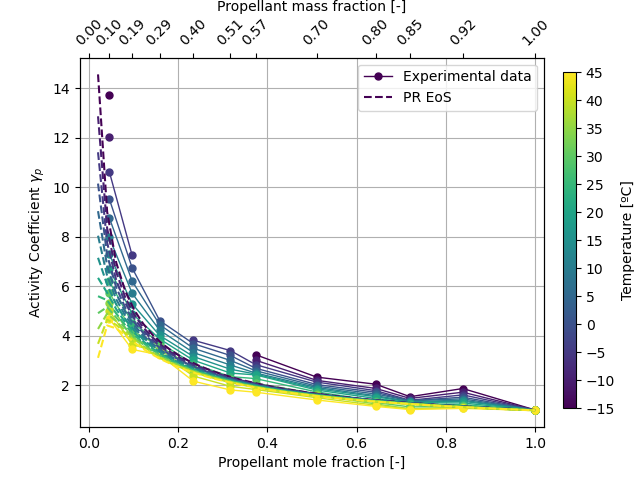

In [914]:
ax=make_composite_pressure_plot(all_temp, 1-ethx_, 1-ethww_, activity, None, None, 'Propellant mole fraction [-]', 'Propellant mass fraction [-]', r'Propellant Activity $a_p$');

lab="PR EoS"
for i in range(len(practivity)): 
    ax.plot(x, practivity[i] , label=lab, c=cfun(normt(all_temp[i])), ls='--')
    lab=None
ax.legend();

ax=make_composite_pressure_plot(all_temp, 1-ethx_, 1-ethww_, gamma   , None, None, 'Propellant mole fraction [-]', 'Propellant mass fraction [-]', r'Activity Coefficient $\gamma_p$');

lab="PR EoS"
for i in range(len(prgamma)): 
    ax.plot(x, prgamma[i] , label=lab, c=cfun(normt(all_temp[i])), ls='--')
    lab=None
ax.legend();



### Use canister mass and volume data to compute all mole fractions

Using the net canister volume (const.) and weight (const wrt. T) combined with the mixture mole / mass fractions we should be able to use the EoS fit to determine $x_1, x_2, y_1$ \& $y_2$ and thus back out the molar volume from these independent variables.

If we define the liquid and vapour for each species in number of moles;

$ m_{meas} = W/g = \left(n_{pl} + n_{pv}\right) M_{wt,p} + \left(n_{el} + n_{ev}\right) M_{wt,e} - \rho_a V_{sys} $

$ x_1 = \frac{n_{pl}}{n_{pl}+n_{el}} $

$ x_2 = 1 - x_1$

$ y_1 = \frac{n_{pv}}{n_{pv}+n_{ev}} $

$ y_2 = 1 - y_1 $

$ \overline{x} = \frac{n_{pl}+n_{pv}}{n_{pl}+n_{pv}+n_{el}+n_{ev}}$

$ V_{sys} =  \left(n_{pl}+n_{el}\right) V_{m,l} + \left(n_{pv}+n_{ev}\right) V_{m,v} $

$ V_{m,l} = V_{m,pl} x_1 + V_{m,el} x_2 $

In [262]:
def moleFractions(n_, temp, rho_a=1.21e-3):
    
    n_pl, n_pv, n_el, n_ev = n_
    x1 = n_pl / (n_pl + n_el)
    x2 = 1 - x1
    
    # molar volumes [m3/mol]
    V_mpl = purePropLiquidMolarVolume(temp)
    V_mel = ethanolLiquidMolarVolume(temp)
    V_ml = V_mpl*x1 + V_mel*x2
    # V_mv = np.array(Z)*R*TK/pressure

    # absolute system volume [m3]
    V_sys = (n_pl+n_el)*V_ml + (n_pv+n_ev)*V_mv
    
    # net mass
    mass_grams = (n_pl+n_pv)*mwt_propellant + (n_el+n_ev)*mwt_ethanol - rho_a*V_sys

    # propellant mole fraction
    xbar = (n_pl+n_pv)/(n_pl+n_pv+n_el+n_ev)
    
    return V_sys*1e6, mass, xbar # return sys. volume [cc], net mass [g] and propellant mole fraction [-]